# Decision Tree - Predicting Breast Cancer.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   

## Importing dataset from sklearn

In [3]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()


In [6]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Creating DataFrame

In [10]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Splitting into independent and dependent variable

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Splitting into training and test set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Training the model.

In [17]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(X_train , y_train)
y_pred = treeClassifier.predict(X_test)

In [18]:
## Checking accuracy
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.9385964912280702
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



## Visualizing the decision tree

[Text(0.6145833333333334, 0.9375, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3958333333333333, 0.8125, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.2916666666666667, 0.6875, 'x[10] <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.20833333333333334, 0.5625, 'x[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.16666666666666666, 0.4375, 'x[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(0.08333333333333333, 0.3125, 'x[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3125, 'x[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [1, 251]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [0, 237]'),
 Text(0.2916666666666667, 0.1875, 'x[21] <= 33.56\ngini = 0.124\nsamples = 15\nvalue

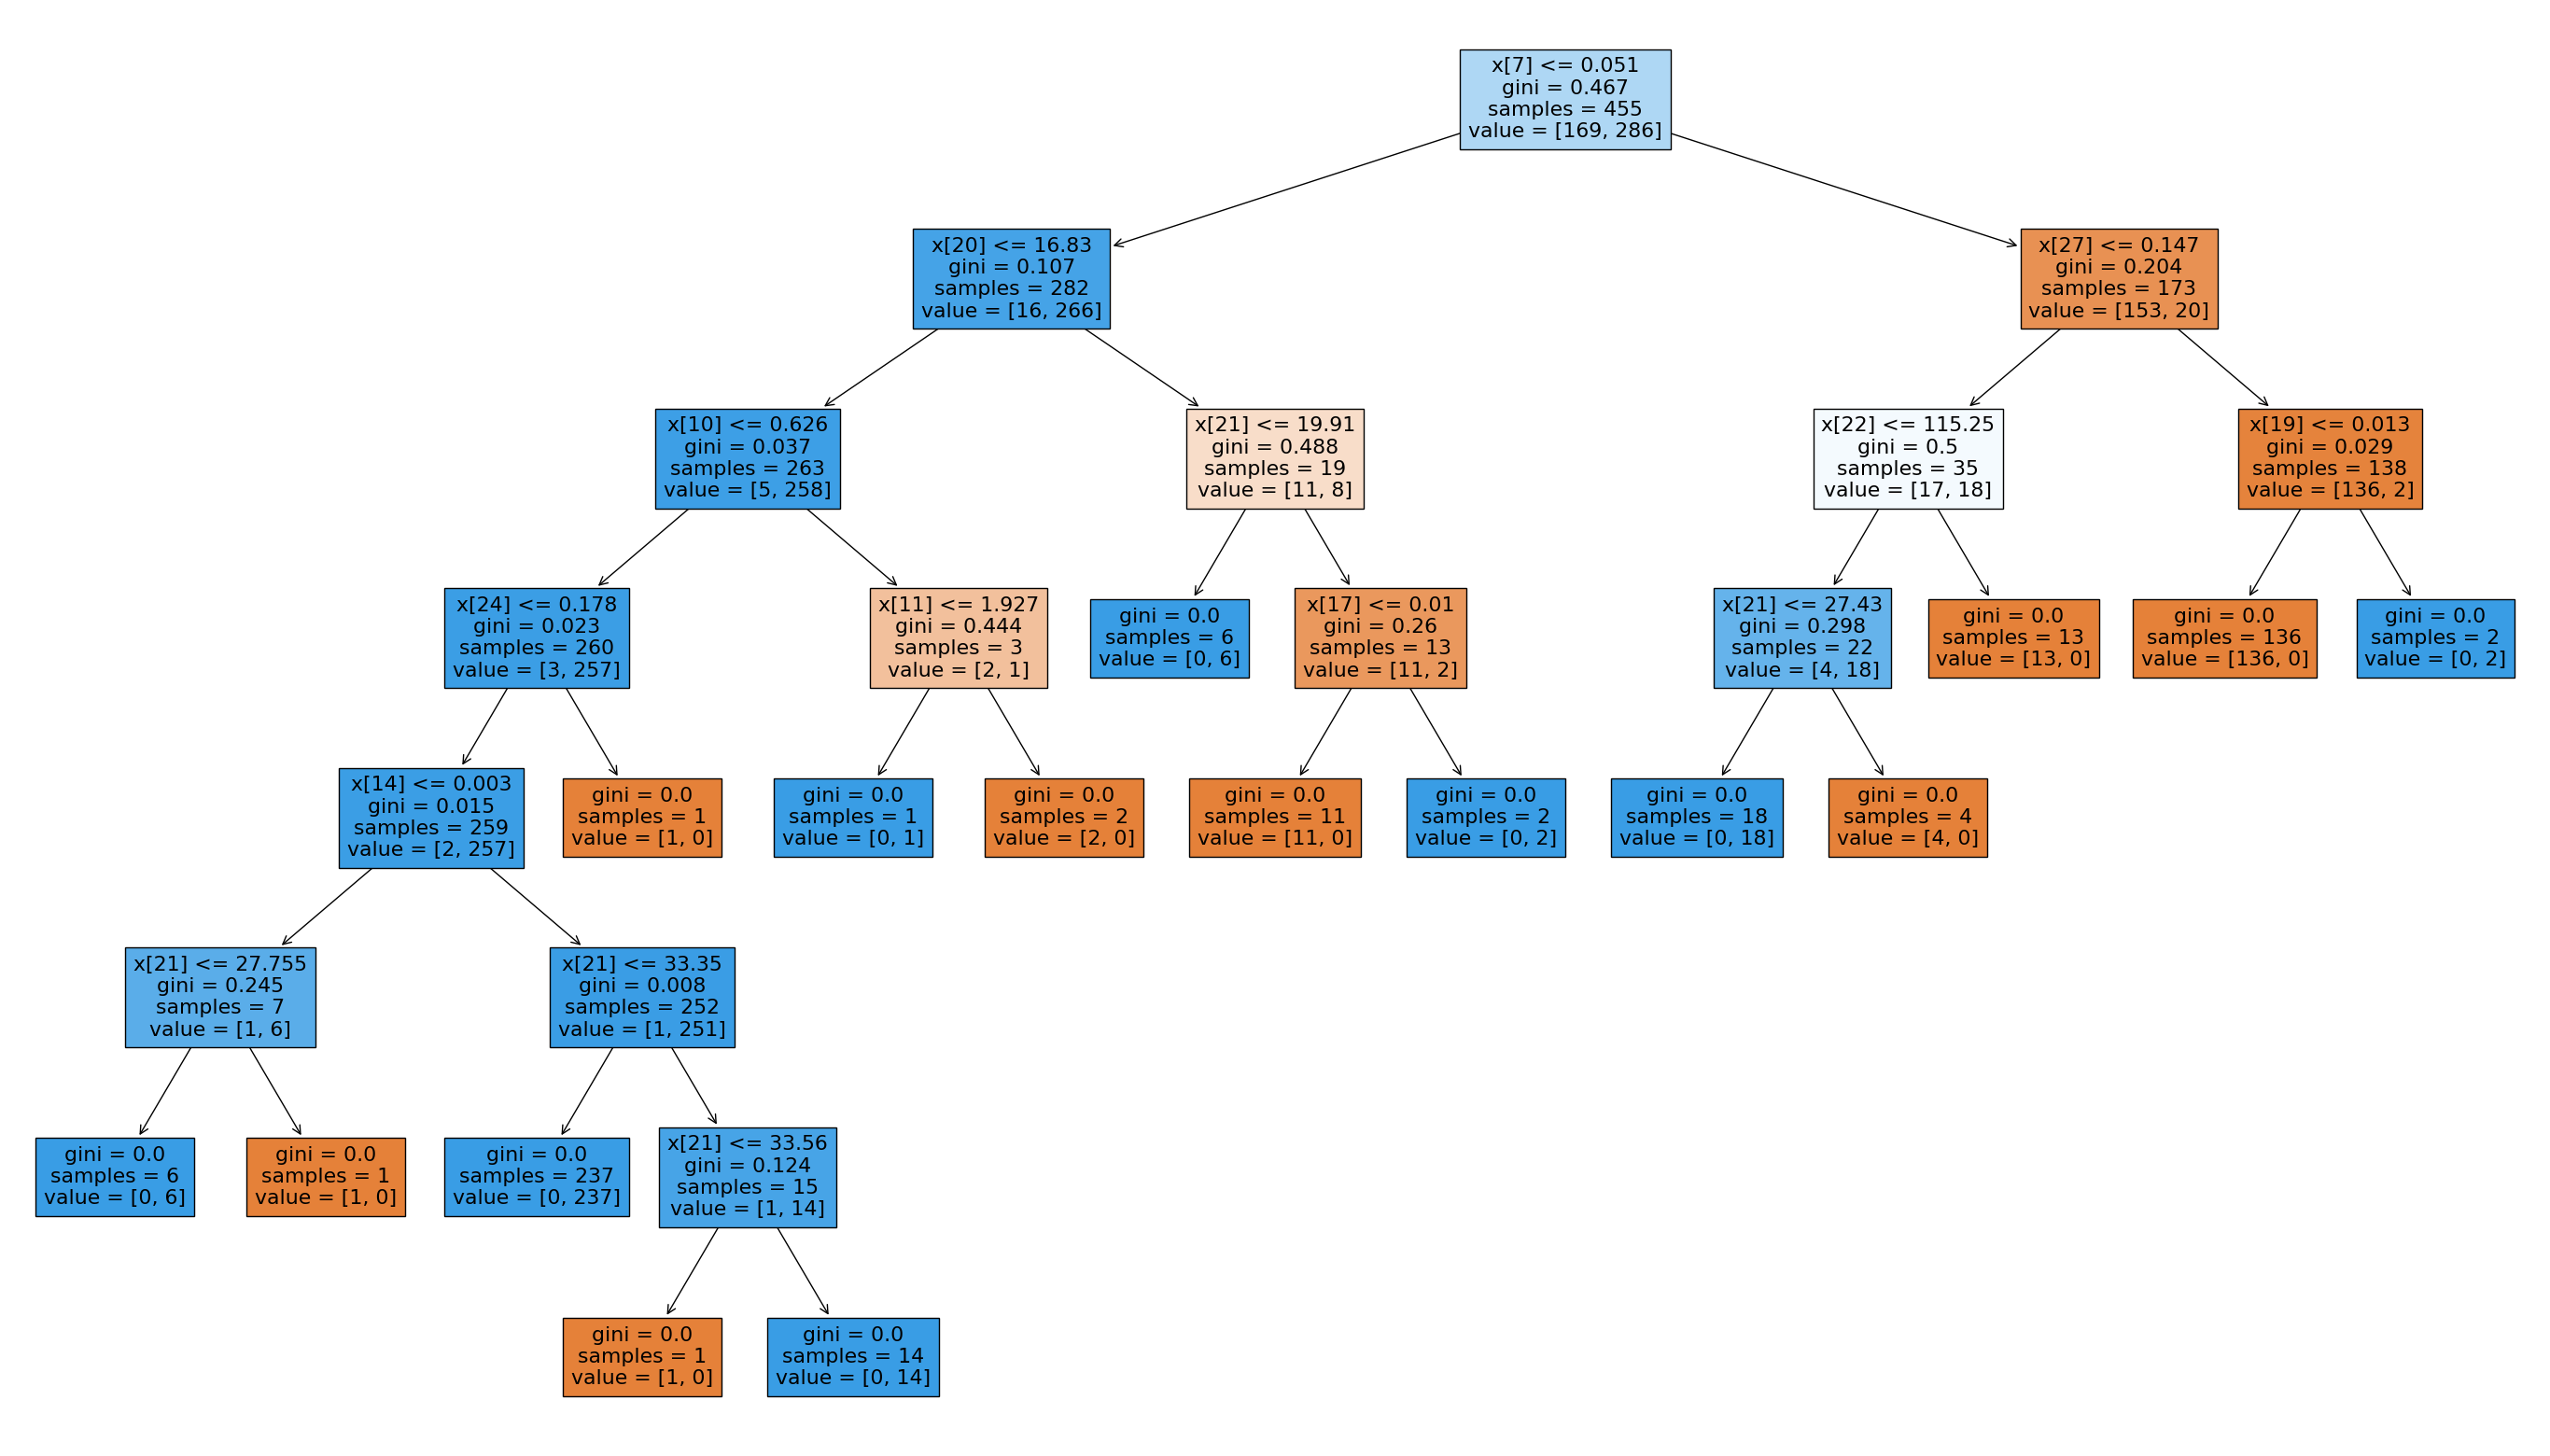

In [23]:
from sklearn import tree
plt.figure(figsize=(35,20))
tree.plot_tree(treeClassifier, filled=True)

## Post Pruning 

In [24]:
treeClassifier = DecisionTreeClassifier(max_depth=3)
treeClassifier.fit(X_train, y_train)
y_pred = treeClassifier.predict(X_test)

In [25]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



# END